In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

In [63]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA Part

### checking the missing data or not

<AxesSubplot:>

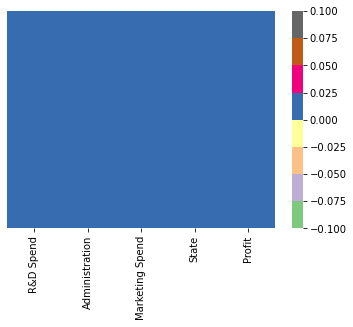

In [64]:
sns.heatmap(df.isnull(),cmap="Accent",yticklabels=False)#Here we see no any missing values present in the dataset

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Introduction of Dummy variables

In [66]:
just_dummies=pd.get_dummies(df["State"])
just_dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [67]:
df_new=pd.concat([df,just_dummies],axis=1)
df_new.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [68]:
#Now drop down the "state" column
df_new=df_new.drop("State",axis=1)

In [69]:
df_new.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### Rename the variables

In [70]:
df_clean=df_new.rename({"R&D Spend":"RD","Administration":"adm","Marketing Spend":"MS","New York":"NY"},axis=1)


In [71]:
df_clean.head()

,RD,adm,MS,Profit,California,Florida,NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### Multivariate plot

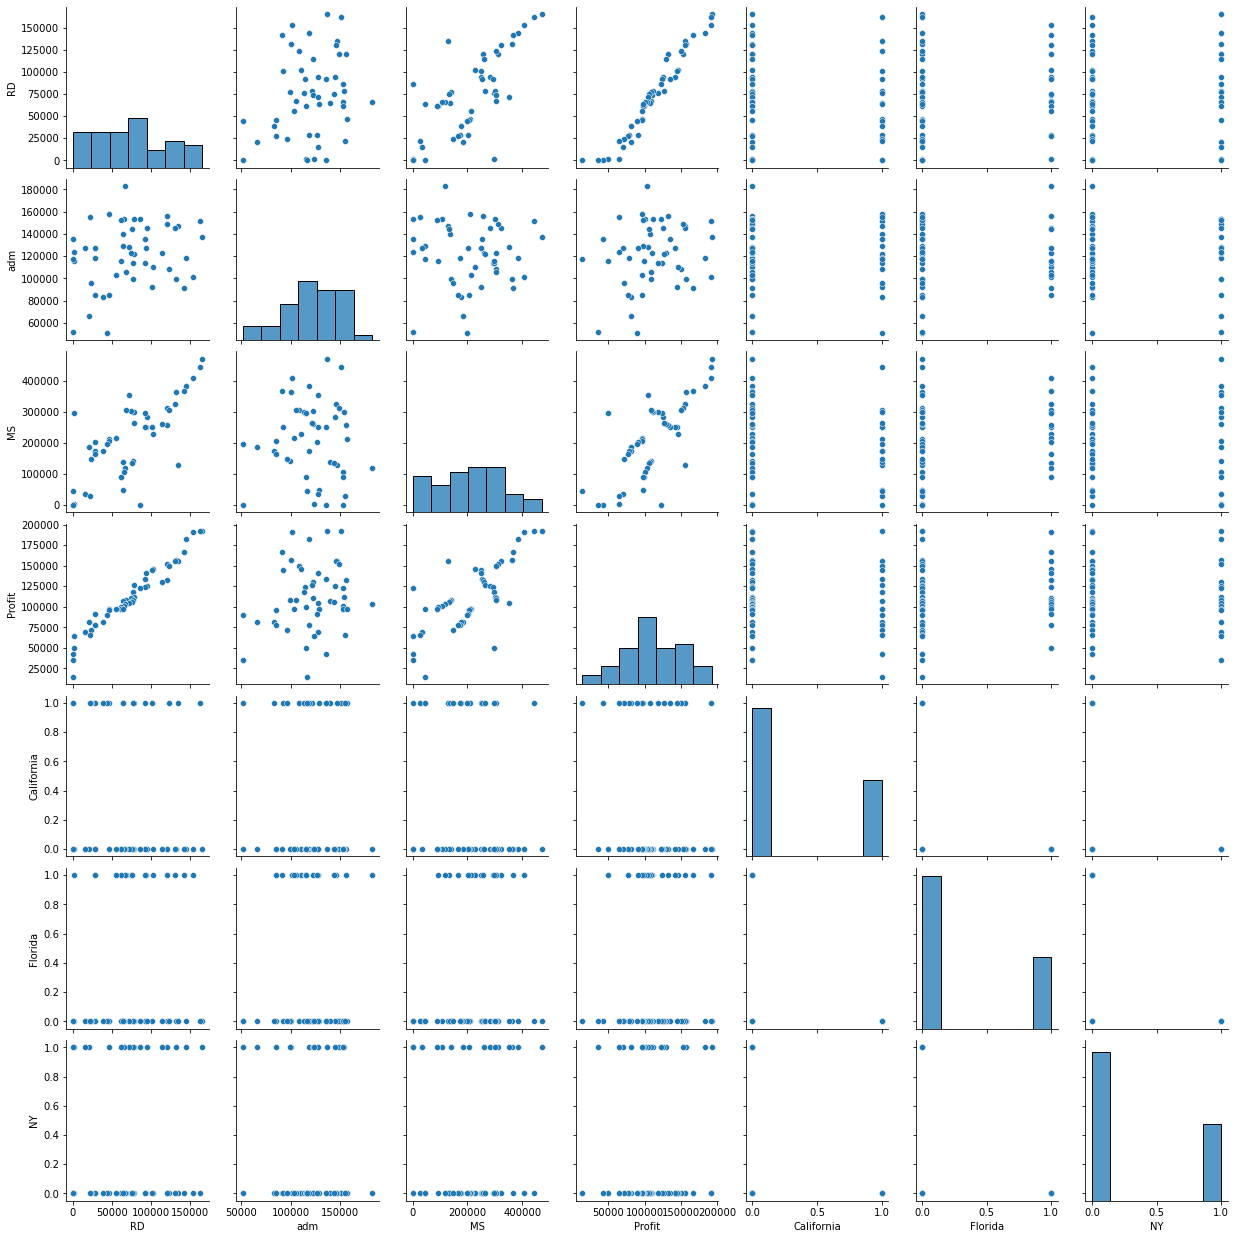

In [72]:
sns.pairplot(df_clean)

In [73]:
df_clean.describe()

,RD,adm,MS,Profit,California,Florida,NY
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


### Correlation plot

<AxesSubplot:>

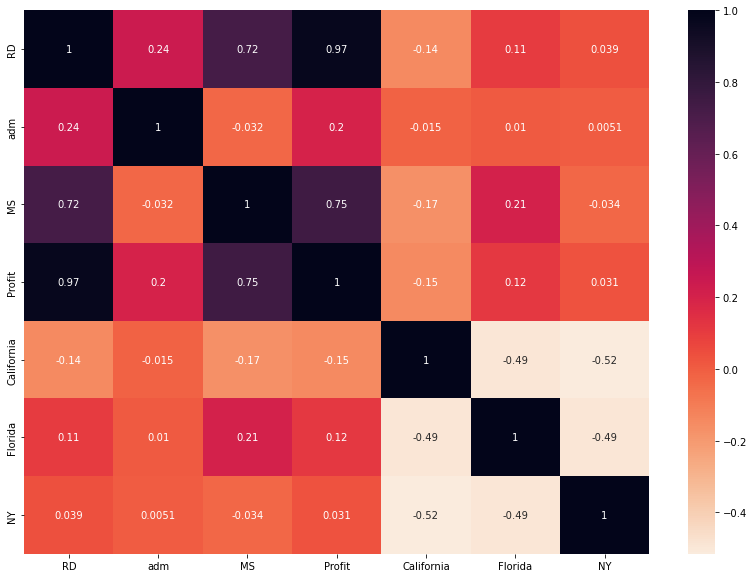

In [74]:
plt.figure(figsize=(14,10))
sns.heatmap(df_clean.corr(),cmap="rocket_r", annot=True)

In [75]:
df_clean[df_clean.duplicated()]#No duplicated items

,RD,adm,MS,Profit,California,Florida,NY


### Feature scaling to the dataset

In [76]:
def normal_scale(value):
    return((value-value.mean())/(value.std()))

In [77]:
df_clean1=normal_scale(df_clean[['RD', 'adm', 'MS', 'Profit']])
df_clean1.head()

,RD,adm,MS,Profit
0,1.996146,0.555117,2.132295,1.990990
1,1.936203,1.071924,1.904267,1.979335
2,1.736731,-0.720938,1.610180,1.960934
3,1.539157,-0.095396,1.407916,1.758771
4,1.489812,-1.069066,1.268648,1.344094


In [78]:
df_clean=pd.concat([df_clean1,df_clean[['California', 'Florida', 'NY']]],axis=1)
df_clean.head()

,RD,adm,MS,Profit,California,Florida,NY
0,1.996146,0.555117,2.132295,1.990990,0,0,1
1,1.936203,1.071924,1.904267,1.979335,1,0,0
2,1.736731,-0.720938,1.610180,1.960934,0,1,0
3,1.539157,-0.095396,1.407916,1.758771,0,0,1
4,1.489812,-1.069066,1.268648,1.344094,0,1,0


### BOX PLOT

<AxesSubplot:xlabel='MS'>

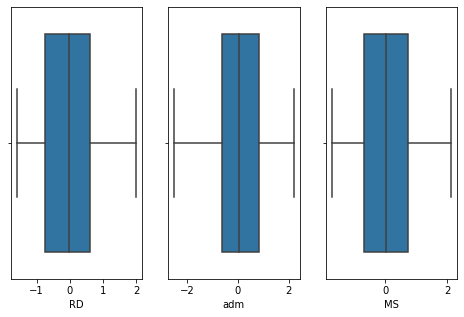

In [79]:
fig,ax=plt.subplots(1,3,figsize=(8,5))
sns.boxplot(df_clean["RD"],ax=ax[0])
sns.boxplot(df_clean["adm"],ax=ax[1])
sns.boxplot(df_clean["MS"],ax=ax[2])


### Building multiple linear regression

In [80]:
df_clean.columns

Index(['RD', 'adm', 'MS', 'Profit', 'California', 'Florida', 'NY'], dtype='object')

In [81]:
model=ols("Profit~RD+adm+MS+California+Florida+NY",data=df_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           1.34e-27
Time:                        15:59:45   Log-Likelihood:                 4.8305
No. Observations:                  50   AIC:                             2.339
Df Residuals:                      44   BIC:                             13.81
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.452e-05      0.025      0.002      0.998      -0.050       0.050
RD             0.9179      0.053     17.369      0.000       0.811       1.024
adm           -0.0188      0.036     -0.517      0.608      -0.092       0.054
MS             0.0819      0.052      1.574      0.123      -0.023       0.187
California    -0.0013      0.048     -0.027      0.979      -0.098       0.095
Florida        0.0037      0.049      0.074      0.941      -0.096       0.103
NY            -0.0023      0.047     -0.049      0.961      -0.098       0.093
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.96e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Testing the model

In [82]:
#model coefficients
model.params

Intercept     0.000055
RD            0.917931
adm          -0.018771
MS            0.081858
California   -0.001279
Florida       0.003653
NY           -0.002319
dtype: float64

In [83]:
np.round(model.pvalues,4)#this is the p values

Intercept     0.9983
RD            0.0000
adm           0.6077
MS            0.1227
California    0.9788
Florida       0.9415
NY            0.9613
dtype: float64

In [84]:
#So we see that administraion and  marketing spend is insignificant because p value> alpha value so this is not significant

In [85]:
model.rsquared, model.rsquared_adj# R^2 and Adjusted R^2

(0.9507524843355148, 0.945156175737278)

In [86]:
#sO THE ACCURACY OF THE MODEL IS 0.9451

#### Now by the help of this variables "adm" and "MP" we have to create a simple and multiple linear regression

In [87]:
model_adm=ols("Profit~adm",data=df_clean).fit()
model_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Mon, 11 Jul 2022   Prob (F-statistic):              0.162
Time:                        15:59:45   Log-Likelihood:                -69.414
No. Observations:                  50   AIC:                             142.8
Df Residuals:                      48   BIC:                             146.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.326e-16      0.140   -3.8e-15      1.000      -0.281       0.281
adm            0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
model_adm.pvalues#So we see that individual effect of adm to the profit is insignificant because its p value >alpha

Intercept    1.000000
adm          0.162217
dtype: float64

In [89]:
model_ms=ols("Profit~MS",data=df_clean).fit()
model_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           4.38e-10
Time:                        15:59:45   Log-Likelihood:                -49.965
No. Observations:                  50   AIC:                             103.9
Df Residuals:                      48   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.326e-16      0.095  -5.61e-15      1.000      -0.191       0.191
MS             0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
model_ms.pvalues# But here we see p value<alpha so it is individually significant effect

Intercept    1.000000e+00
MS           4.381073e-10
dtype: float64

In [91]:
model_ms_adm=ols("Profit~MS+adm",data=df_clean).fit()
model_ms_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           2.50e-10
Time:                        15:59:46   Log-Likelihood:                -46.919
No. Observations:                  50   AIC:                             99.84
Df Residuals:                      47   BIC:                             105.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.326e-16      0.090   -5.9e-15      1.000      -0.181       0.181
MS             0.7550      0.091      8.281      0.000       0.572       0.938
adm            0.2250      0.091      2.468      0.017       0.042       0.408
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
model_ms_adm.pvalues# Here if we take both of them then combinely it is significant because p_value<alpha

Intercept    1.000000e+00
MS           9.727245e-11
adm          1.729198e-02
dtype: float64

## Model validation part

### 1)checking multicollinearity using variance inflation factor(VIF)


In [93]:
df_clean.columns

Index(['RD', 'adm', 'MS', 'Profit', 'California', 'Florida', 'NY'], dtype='object')

In [94]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=ols("RD~adm+MS+California+Florida+NY",data=df_clean).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=ols("adm~RD+MS+California+Florida+NY",data=df_clean).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=ols("MS~RD+adm+California+Florida+NY",data=df_clean).fit().rsquared
vif_m=1/(1-rsq_m)

rsq_c=ols("California~MS+RD+adm+Florida+NY",data=df_clean).fit().rsquared
vif_c=1/(1-rsq_c)

rsq_f=ols("Florida~MS+RD+adm+California+NY",data=df_clean).fit().rsquared
vif_f=1/(1-rsq_f)

rsq_n=ols("NY~MS+RD+adm+California+Florida",data=df_clean).fit().rsquared
vif_n=1/(1-rsq_n)

# Putting the values in Dataframe format
d1={'Variables':['RD', 'adm', 'MS', 'California', 'Florida', 'NY'],'Vif':[vif_r,vif_a,vif_m,vif_f,vif_c,vif_n]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD,2.495511
1,adm,1.177766
2,MS,2.416797
3,California,inf
4,Florida,inf
5,NY,inf


### Here the "california", "florida" , "ny" has VIF>20 so it is not consider for the modeling but the remaining variables are important

### 2) Residual analysis

#### Residual plot against predicted value

In [95]:
def get_standardised_value(vals):
    return((vals-vals.mean())/(vals.std()))

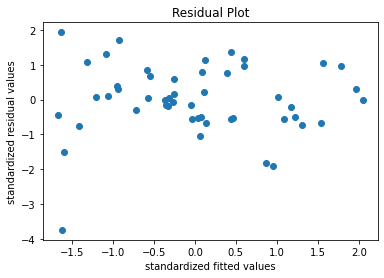

In [96]:
plt.scatter(get_standardised_value(model.fittedvalues),get_standardised_value(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 


#### Residual plot against explanatory variables

<AxesSubplot:xlabel='adm', ylabel='Profit'>

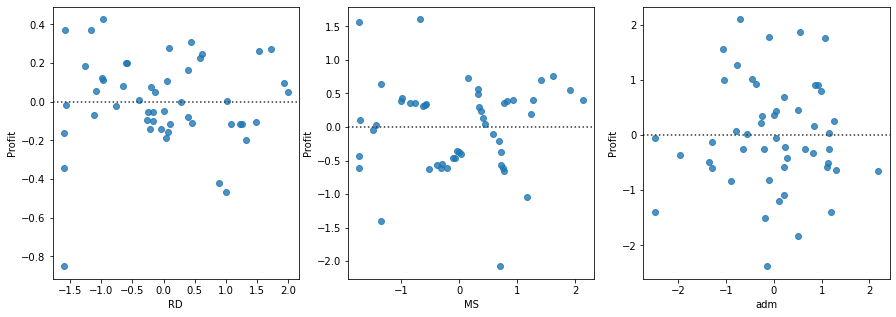

In [97]:

fig, axs = plt.subplots(1,3,figsize=(15,5))
sns.residplot(df_clean["RD"],df_clean["Profit"],ax=axs[0])
sns.residplot(df_clean["MS"],df_clean["Profit"],ax=axs[1])
sns.residplot(df_clean["adm"],df_clean["Profit"],ax=axs[2])

### y and fitted vs x

Text(0.5, 1.0, 'y and fitted vs x')

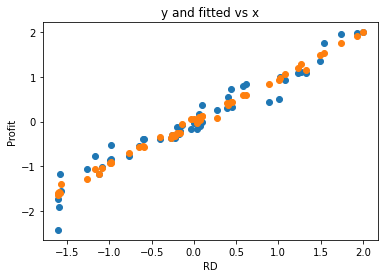

In [98]:
# for RD
plt.scatter(df_clean["RD"],df_clean["Profit"])
plt.scatter(df_clean["RD"],model.fittedvalues)
plt.xlabel("RD")
plt.ylabel("Profit")
plt.title("y and fitted vs x")

Text(0.5, 1.0, 'y and fitted vs x')

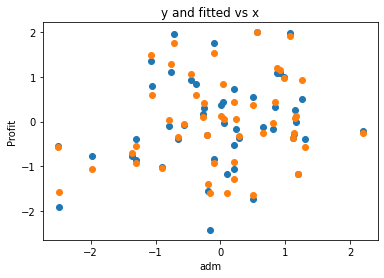

In [99]:
#for adm
plt.scatter(df_clean["adm"],df_clean["Profit"])
plt.scatter(df_clean["adm"],model.fittedvalues)
plt.xlabel("adm")
plt.ylabel("Profit")
plt.title("y and fitted vs x")

Text(0.5, 1.0, 'y and fitted vs x')

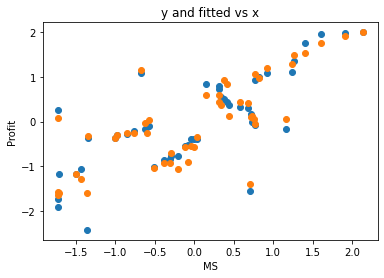

In [100]:
#For MS
plt.scatter(df_clean["MS"],df_clean["Profit"])
plt.scatter(df_clean["MS"],model.fittedvalues)
plt.xlabel("MS")
plt.ylabel("Profit")
plt.title("y and fitted vs x")

### Model delition diagnosis

#### Detecting influencers/outliers

*COOKS DISTANCE-Measures the difference between the regression coefficent obtained from the full data and the regression coefficient obtained by deleting the ith observation.
If cooks distance >or = 1 then the point is outliers*

In [101]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([6.58235373e-06, 3.39430615e-03, 2.39098625e-02, 2.02032950e-02,
       1.20198420e-02, 1.00370545e-02, 2.13697864e-03, 3.57036535e-03,
       6.25257581e-05, 5.41213369e-03, 1.89764313e-02, 1.65867572e-02,
       1.82797330e-02, 6.34364572e-03, 6.17285106e-02, 3.72134923e-02,
       1.35078103e-02, 3.71193311e-03, 2.94854637e-03, 2.81922632e-02,
       6.02783697e-04, 1.00287995e-02, 3.02178458e-03, 3.16115939e-04,
       4.34597714e-03, 3.56884817e-03, 4.96640589e-03, 2.78597505e-02,
       9.20897921e-04, 9.83021751e-05, 2.28936703e-05, 3.65145585e-06,
       5.61582963e-04, 2.31043414e-04, 1.79909586e-02, 7.13289875e-03,
       5.07832730e-02, 6.16526089e-05, 4.78300794e-02, 1.37854568e-03,
       1.94676475e-03, 1.88154422e-03, 1.42427114e-04, 2.00561912e-02,
       1.00026059e-04, 8.09098153e-02, 3.62771435e-02, 3.84131479e-03,
       1.34036686e-01, 2.26250945e-01])

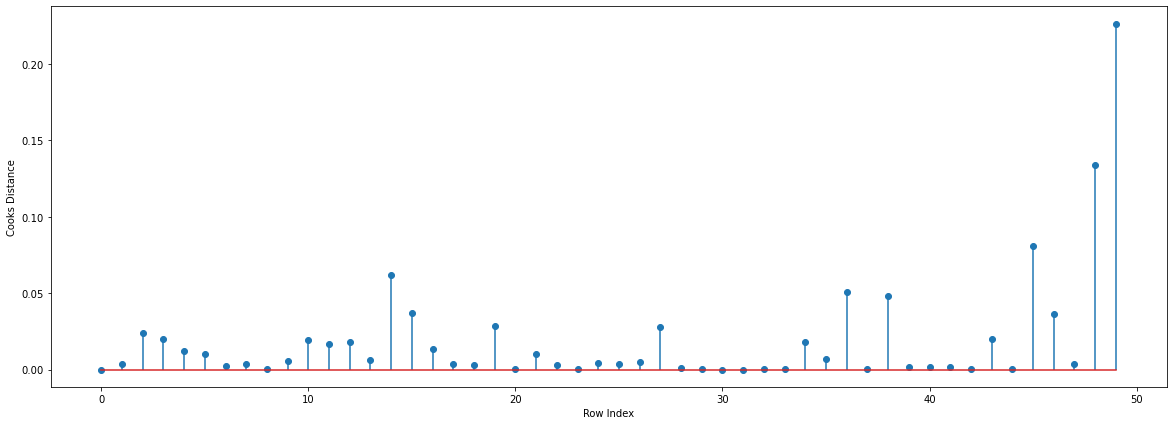

In [102]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df_clean)),np.round(c,4))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

#### Index and value of influencer where c is more that 0.5

In [103]:
(np.argmax(c),np.max(c))#Since 49 index will be remove from the dataset because it is a outlier

(49, 0.2262509450567321)

### High influence point

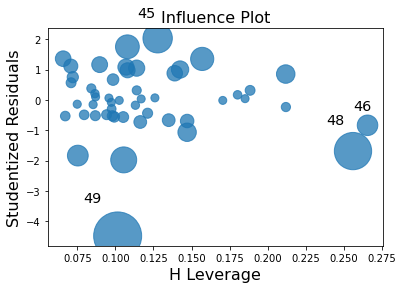

In [104]:
influence_plot(model)
plt.show()# Here we clearly see 49 data point is a outlier

### For leverage cut off
* Leverage value of an observation measure the influence of that observation on the overall fit of the regression function
*Leverage value more than 3(k+1)/n is treated as highly influential observation, where k is the number of features in the model and n is the sample size

In [105]:
k=df_clean.shape[1]
n=df_clean.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.48

In [106]:
#IT MEANS ABOVE 0.48 IS THE HIGH INFLUENCE CUT OFF

In [107]:
df_clean[df_clean.index.isin([49,48,46])] # Th

,RD,adm,MS,Profit,California,Florida,NY
46,-1.577399,-0.197318,0.703975,-1.551174,0,1,0
48,-1.594248,-2.484188,-1.725608,-1.893983,0,0,1
49,-1.606056,-0.155645,-1.356216,-2.414797,1,0,0


In [108]:
 #Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df_clean2=df_clean.drop(df_clean.index[[49,48,46]],axis=0).reset_index(drop=True)
df_clean2.head()

,RD,adm,MS,Profit,California,Florida,NY
0,1.996146,0.555117,2.132295,1.990990,0,0,1
1,1.936203,1.071924,1.904267,1.979335,1,0,0
2,1.736731,-0.720938,1.610180,1.960934,0,1,0
3,1.539157,-0.095396,1.407916,1.758771,0,0,1
4,1.489812,-1.069066,1.268648,1.344094,0,1,0


### Build the model again until the cooks_distance <1 and generate R_square

In [109]:
while np.max(c)>0.5 :
    model=ols("Profit~RD+adm+MS+California+Florida+NY",data=df_clean2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df_clean2=df_clean2.drop(df_clean2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df_clean2
else:
    final_model=ols("Profit~RD+adm+MS+California+Florida+NY",data=df_clean2).fit()
    final_model.rsquared , final_model.aic
    print("So the final model accuracy is ",final_model.rsquared)

So the final model accuracy is  0.961478415327212


## Final model prediction

In [110]:
#Lets take a new data point for the prediction

In [111]:
new_data=pd.DataFrame({'RD':40000,"adm":80000,"MS":200000,"California":0,"Florida":1,"NY":0},index=[0])
new_data

,RD,adm,MS,California,Florida,NY
0,40000,80000,200000,0,1,0


In [112]:
final_model.predict(new_data)

0    47318.140774
dtype: float64

In [113]:
#And the final model prediction to the dataset which does not contain any outliers data points


### *Dataframe of actual value and predicted value*

In [114]:
predicted_data=pd.DataFrame({"Actual_value":df_clean2["Profit"],"Predicted_value":final_model.predict(df_clean2)})
predicted_data

,Actual_value,Predicted_value
0,1.990990,1.911363
1,1.979335,1.838136
2,1.960934,1.692040
3,1.758771,1.481366
4,1.344094,1.463423
5,1.115920,1.256073
6,1.094370,1.113578
7,1.085192,1.142237
8,0.997344,0.945071
9,0.936514,1.061418


### R^2 TABLE FOR EACH PROPOSED MODEL

In [115]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950752
1,Final_Model,0.961478
